# Matplotlib

# Pylab vs. Matplotlib
- Matplotlib is the **real** plotting library; `pylab` just robs from it (and `numpy`)
- Most plotting-centered functions really come from `matplotlib`'s `pyplot` submodule
- Get at it more directly by importing `matplotlib.pyplot`, which we traditionally alias to `plt`

In [163]:
import pylab
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')

# Basic Example: Plotting Hyperbolic functions in `pylab`:
Recall (or behold, if you haven't seen them before!) the hyperbolic trigonometric functions, $\sinh$ and $\cosh$:

$$\sinh(x) = \frac{e^x-e^{-x}}{2}\qquad \cosh(x) = \frac{e^x + e^{-x}}{2}$$

`numpy`/`pylab` provide shortcut functions for these. Let's first visualize them with `pylab`:

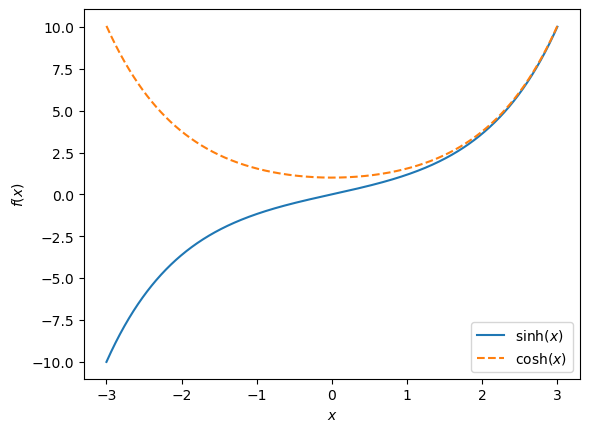

In [164]:
xs_pylab = pylab.linspace(-3, 3, 1000)
ys1_pylab = pylab.sinh(xs_pylab)
ys2_pylab = pylab.cosh(xs_pylab)
pylab.plot(xs_pylab, ys1_pylab, label='$\sinh(x)$')
pylab.plot(xs_pylab, ys2_pylab, ls='--', label='$\cosh(x)$')
pylab.xlabel('$x$'); pylab.ylabel('$f(x)$'); pylab.legend(loc='best')

# Basic Example: Plotting Hyperbolic functions with `numpy` and `matplotlib`:
Now let's do the same thing without using `pylab` at all:

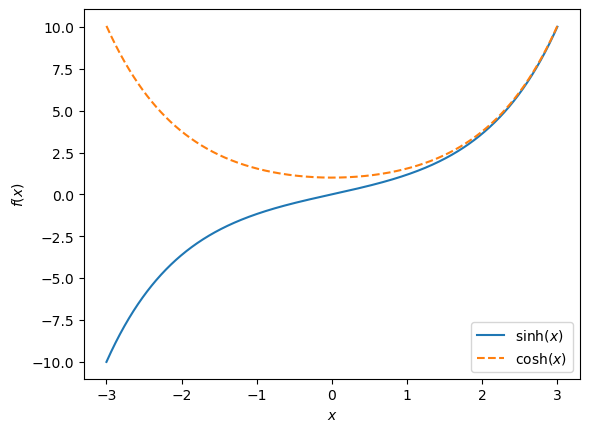

In [168]:
xs = np.linspace(-3, 3, 1000)
ys1 = np.sinh(xs)
ys2 = np.cosh(xs)
plt.plot(xs, ys1, label='$\sinh(x)$')
plt.plot(xs, ys2, ls='--', label='$\cosh(x)$')
plt.xlabel('$x$'), plt.ylabel('$f(x)$'); plt.legend(loc='best')

# Why not just rely on `pylab`?
- For quick plots... not really an issue
- For more complex plots with multiple panels and more customization, `pylab`/`pyplot` is very cumbersome
- Once you learn the more flexible approach, you'll want to stay with it for consistency

# State Machine vs. Object-Oriented Approach
In using `pyplot` (`plt`) we are implicitly using the "state machine" of `matplotlib`.
- There is one figure that `plot`, `legend`, `xlabel`, etc. implicitly "go to"
- To create a new figure for subsequent calls to go to, need to call `plt.figure()`, but then it is hard to get a handle on the older figure
- `matplotlib` has a sense of "state"; what the current figure is and how it is set up

We'll move to using the object-oriented approach. All aspects of a figure are instances of various classes and they each have their own attributes and methods
- `Figure` encompasses an entire figure of any kind, plots or otherwise
- `Axes` is a coordinate axes, including any plotted data; this is what we usually want to work iwth
- `Line2D` is an object that controls a single line-plot's worth of data on a given `Axes` instance

There are a dizzying number of distinct classes that make up figures, but the most important are `Figure` and `Axes`.

# Object-Oriented Approach: Creating Figures
A figure object is instantiated by `pyplot`'s `figure()` constructor. There are many optional arguments to this function, but the most useful is probably `figsize`, which you can set to a tuple which gives the dimensions (length, width) of the desired figure, in inches.

So the following would create a figure that is 6 inches wide by 4 inches tall and stores it in `fig`:

```python
fig = plt.figure(figsize=(6, 4))
```

# Object-Oriented Approach: Adding Axes to a Figure
Once a figure is instantiated, we can add an `Axes` object, which is what we can use to plot data. The classic way to do this is to call the `add_subplot` method of the `Figure` instance you want to add the axes to.

We can see how we are already "naming" objects so that we can get at them, possibly juggling multiple axes (panels) in multiple figures.

`add_subplot` takes three integer arguments (sort of). They represent the number of rows of subplots there will be in the figure, then the number of columns of subplots there will be, and finally the index (starting at 1 for some reason) of the plot we actually want to create. Indexing goes from top to bottom, left to right.

**Shortcut:** Rather than using three integers, us a single three digit integer, with the hundreds, tens, and ones places representing the three original digits.

# Example: Creating figures and axes

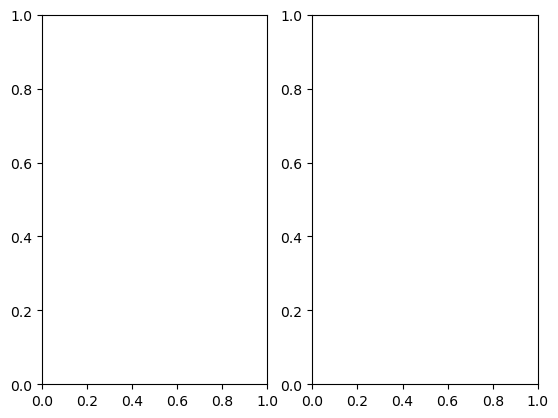

In [21]:
# create the figure
fig = plt.figure()

# create left axis object in a 1-row, 2-columns setup
ax1 = fig.add_subplot(1, 2, 1)
# create right axis object in a 1-row, 2-columns setup using the `add_subplot` shortcut
ax2 = fig.add_subplot(122)

# Shortcut: Create the figure and all subplots in one call!
Not well-known enough: `plt.subplots`. This function combines aspects of `plt.figure` and the `add_subplot` method of figures, ultimately returning a figure and an iterable of axis objects, which are instead **indexed from zero**. The function takes two integers, which are the same as the first two arguments to `add_subplot`, but it has many other optional arguments. If there are only one row and one column, the return value will just be a tuple of a figure and a single axis object.

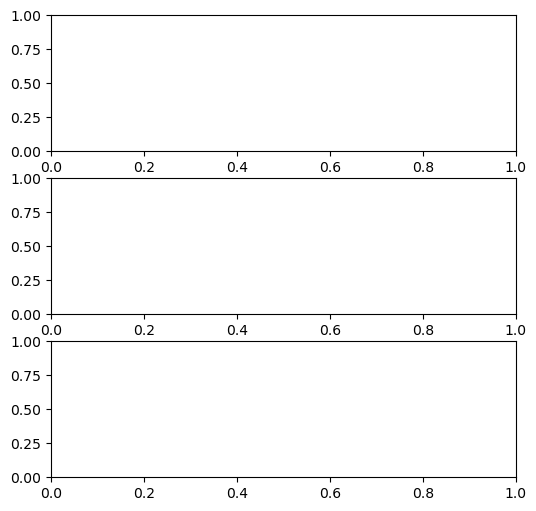

In [31]:
# create figure (fig) and an ARRAY of axes objects (axes) over three rows and one column
fig, axes = plt.subplots(3, 1, figsize=(6, 6))

# Subplots/Axes: The Main Event!
- Axes objects are the ones that can accept `plot` and `scatter` method calls.
- Lines, labels, and legends are all attached to axes objects, and most of the functions are the same as in `pylab`/`pyplot`'s state machine approach.
- Main difference is labels (`xlabel()` → `set_xlabel()`) and limits (`xlim()` → `set_xlim()`).

# Hyperbolic trig functions revisited: Object-Oriented Approach

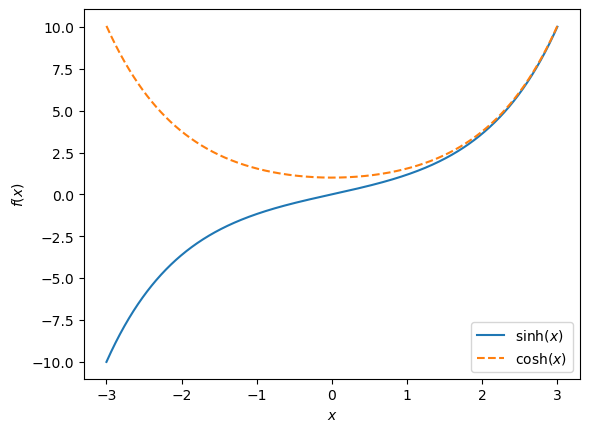

In [169]:
fig, ax = plt.subplots(1, 1)
ax.plot(xs, ys1, label='$\sinh(x)$')
ax.plot(xs, ys2, ls='--', label='$\cosh(x)$')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.legend(loc='best')

# Example: 3 Harmonics in 3 Panels
Goal: plot the three functions $f_1(x) = \sin(x)$, $f_2(x) = \sin(2x)$, and $f_3(x) = \sin(3x)$ in three vertically-stacked panels, all from $x=0$ to $x=2\pi$.

**Pro Tip**: Specifying `sharex=True` in call to `subplots` will force stacked plots to share the same ticks and tick labels, regardless the range over which they are plotted

In [177]:
# first, create the data

# Make figure and axes: 3 rows, one column!

# plot each function in its own axis


# Focus: Customizing Dashstyles
We've seen that you can specify a linestyle for a `plot` command using simple strings like `'-'` (solid; default), `'--'` (dashed), `':'` (dotted), and `'-.'` (dash-dotted). But you can actually customize these to arbitrary pattern by providing a value to the optional `dashes` keyword argument.

`dashes` takes an iterable that gives the lengths of "on" and "off" patterns, measured in points. For example,

```python
ax.plot(xs, ys, dashes=[3, 1.5, 1.5, 1.5])`
```
will plot with a pattern of 3 points drawn, 1.5 points off, 1.5 on, and another 1.5 off, and then the pattern repeats. This is essentially a dot-dash pattern.

# Example: Lots of Dashes!

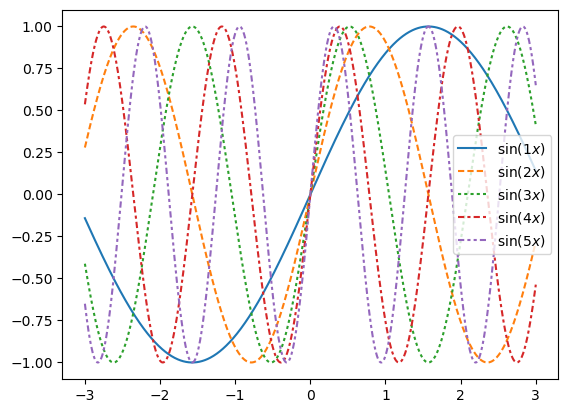

In [51]:
dashstyles = ('', [3, 1.5], [1.5, 1.5], [3, 1.5, 1.5, 1.5], [3, 1.5, 1.5, 1.5, 1.5, 1.5])
fig, ax = plt.subplots(1, 1)
for i, ds in zip(range(1, len(dashstyles) + 1), dashstyles):
    ax.plot(xs, np.sin(i * xs), dashes=ds, label=r'$\sin(' + str(i) + 'x)$')
ax.legend(loc='best')


# Focus: Adding Markers to Line Plots
We know that we can make scatter plots (markers only; no connecting lines) by using the `scatter` method of axes, but we can also include markers in a standard plot by specifying the `marker` keyword argument. By default, it will add a marker at *every point*, which is probably too often, so you can also specify `markerevery`, which will only plot a marker for every $n$ points, for some chosen value of $n$.

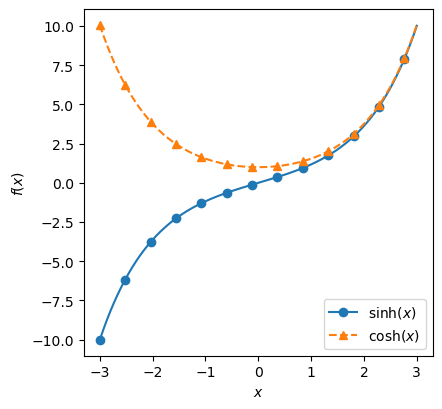

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(4.5,4.5))
ax.plot(xs, ys1, marker='o', markevery=80, label='$\sinh(x)$')
ax.plot(xs, ys2, marker='^', markevery=80, ls='--', label='$\cosh(x)$')
ax.set_xlabel('$x$'); ax.set_ylabel('$f(x)$'); ax.legend(loc='best')

# Scatter Plots: Using Color and Size
Below I implement Hill's [Problem 7.1.3](https://scipython.com/book/chapter-7-matplotlib/problems/p71/bmi-variation-with-of-gdp/), with some stylistic choices of my own.

In [130]:
# load bmi data
dt = np.dtype([('country', 'U60'), ('bmi', 'float64')])
bmi_data = np.genfromtxt('bmi_men.tsv', dtype=dt, delimiter='\t')

# load gdp data
dt2 = np.dtype([('country', 'U60'), ('gdp', 'float64')])
gdp_data = np.genfromtxt('gdp.tsv', dtype=dt2, delimiter='\t', filling_values=-1, skip_footer=1)

# load population data (try on your own first!)
dt3 = np.dtype([('country', 'U60'), ('population', 'float64')])
pop_data = np.genfromtxt('population_total.tsv', dtype=dt3, delimiter='\t', filling_values=-1, skip_footer=1)

# load continent data
# witchcraft to get a list of the default colors
lines_color_cycle = [p['color'] for p in plt.rcParams['axes.prop_cycle']]
dt4 = np.dtype([('country', 'U60'), ('continent', 'U60')])
con_data = np.genfromtxt('continents.tsv', dtype=dt4, delimiter='\t')
continents = list(set(con_data['continent']))
continent_colors = dict(zip(continents, lines_color_cycle[:len(continents)]))
continent_colors


{'Africa': '#1f77b4',
 'South America': '#ff7f0e',
 'Oceania': '#2ca02c',
 'Asia': '#d62728',
 'North America': '#9467bd',
 'Europe': '#8c564b'}

In [143]:
# this cell just creates one record array with all countries that have valid data in all categories
# (bmi, gdp, population, and continent), so that they can be easily accessed and consistently used
# in the plotting (next cell)

# first, go through each country and assemble its bmi, gdp, population, and color,
# creating a list of tuples
records = []
for country, bmi in bmi_data:
    if country in gdp_data['country'] and country in pop_data['country'] and country in con_data['country']:
        gdp_loc = np.where(gdp_data['country'] == country)[0]
        pop_loc = np.where(pop_data['country'] == country)[0]
        con_loc = np.where(con_data['country'] == country)[0]
        gdp = gdp_data['gdp'][gdp_loc]
        pop = pop_data['population'][pop_loc]
        # ran into strange problem where the "location" for a continent
        # still returned an array, so catch that and just de-reference
        # it one more time... I was too lazy to properly figure out
        # what was going on
        try:
            color = continent_colors[cont_data['continent'][con_loc]]
        except TypeError as e:
            color = continent_colors[cont_data['continent'][con_loc[0]]]
        if gdp > 0 and pop > 0:
            records.append((country, bmi, gdp, pop, color))

# now convert the list of tuples into a record array
dt5 = np.dtype([('country', 'U60'), ('bmi', 'float64'), ('gdp', 'float64'), ('population', 'float64'), ('color', 'U60')])
all_data = np.array(records, dtype = dt5)
    

(19.1358685, 30.0)

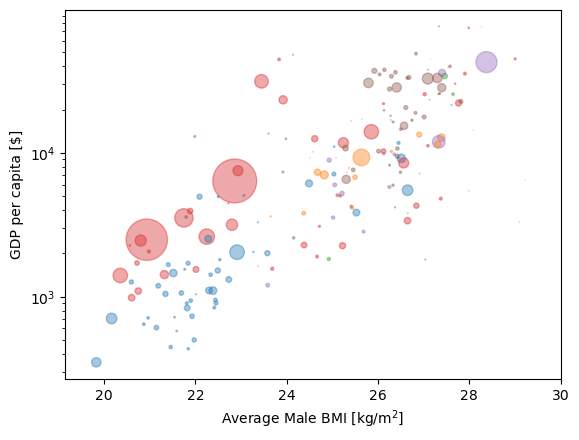

In [151]:
fig, ax = plt.subplots(1, 1)
# all the magic in one line! scatter plot of bmi vs gdp, but get sizes of markers from the population,
# scaled to it looks nice to the eye, and setting the color according to the continent
# note also the use of alpha, which adds some trasparency to the bubbles so we can "see through" them
ax.scatter(all_data['bmi'], all_data['gdp'], s=all_data['population'] / max(all_data['population']) * 1000, c=all_data['color'], alpha=0.4)
ax.set_xlabel('Average Male BMI [kg/m$^2$]')
ax.set_ylabel('GDP per capita [\$]')

# using log scale makes the diversity among the low gdp nations more clear
ax.set_yscale('log')

# chop off some high-bmi outliers (maybe not a good idea, but it looks nicer!)
ax.set_xlim(right=30)

# Customizing Tickmarks
The **ticks** are the little lines along the axis edges that set the scale and values in a plot. `matplotlib` is usually pretty good about making these look decent, but you can customize them to an arbitrary precision using these methods of axes objects:
- `set_yticks` and `set_xticks` (sets the positions of major or minor tickmarks)
- `set_yticklabels` and `set_xticklabels` (sets the labels for major or minor tickmarks)
- `tick_params` (change appearance of major and/or minor tick marks)

# Example: Tinkering with Tickmarks
Here we want to create a figure showing a generic sine curve, without specifying a wavelength or amplitude. That is, we want to show a generic plot of

$$f(x) = A\sin\left(\frac{2\pi x}{\lambda}\right)$$

Text(0.95, 0.95, '$f(x) = A\\sin\\left(\\frac{2\\pi x}{\\lambda}\\right)$')

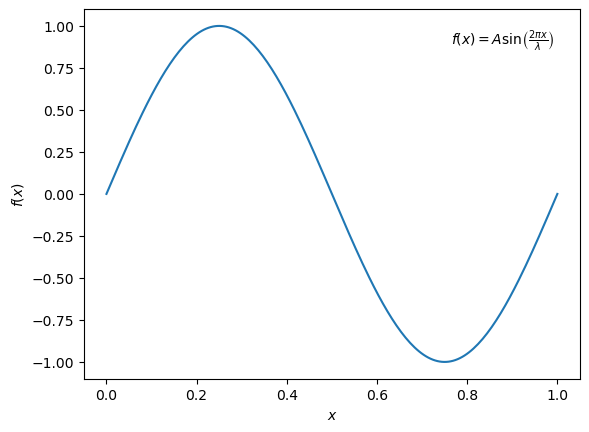

In [181]:
xs = np.linspace(0, 1, 200)
# implicitly: lambda is 1 and A is one
ys = np.sin(2*np.pi * xs)
fig, ax = plt.subplots(1, 1)
ax.plot(xs, ys)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

# TODO: change positions and labels of tick marks to be more "generic"

# TODO: make tick marks point inward (my personal preference)

# show arbitrary label (not a legend); coming up soon!
ax.text(0.95, 0.95, r'$f(x) = A\sin\left(\frac{2\pi x}{\lambda}\right)$', ha='right', va='top', transform=ax.transAxes)

# Errorbars
Most experimental data is meaningless without associated uncertainties. On plots, we represent uncertainties with error bars, expressing the region of confidence around a data point.

`matplotlib` axes objects have the powerful `errobar` function, which plots a line plot, optionally with markers, and can also specify uncertainties in either the $x$ or $y$ directions in the following ways:
- No uncertainty (no errobar)
- Constant uncertainty for all values
- Varying, but symmetric (plus or minus) uncertainties
- Asymmetric and varying (different positive and negative undertaintes

# Example: "Noisy Drop the Rock"
We want to create simulated data for measuring the position of a falling object as a function of time. We know that an object dropped from rest should roughly follow the equation

$$y(t) = y_0 - \frac{1}{2}gt^2$$

Suppose we could only measure the time accurate to within one tenth of a second, and we could only measure the position to within a 25 centimeters (we're really bad at that, I guess). Let's first generate some bogus experimental data by adding some random noise, and then we'll plot it using `errorbar`.

In [230]:
num_points = 15  # number of measurements
t_unc = 0.1  # uncertainty in time measurements, in seconds
y_unc = 0.25  # uncertainty in position measurements, in meters
y_0 = 10.0  # initial height, in meters
g = 9.81  # acceleration due to gravity, in m/s^2

# np.random.random creates random values between 0 and 1, so we subtract a half, and
# multiply by 2 to get a random number between -1 and 1, and then multiply by the
# uncertainty
expected_times = np.linspace(0,1.5, num_points)
noisy_times = expected_times + 2 * (np.random.random(num_points) - 0.5) * t_unc

expected_ys = y_0 - 0.5 * g * expected_times**2
noisy_ys = expected_ys + 2 * (np.random.random(num_points) - 0.5) * y_unc

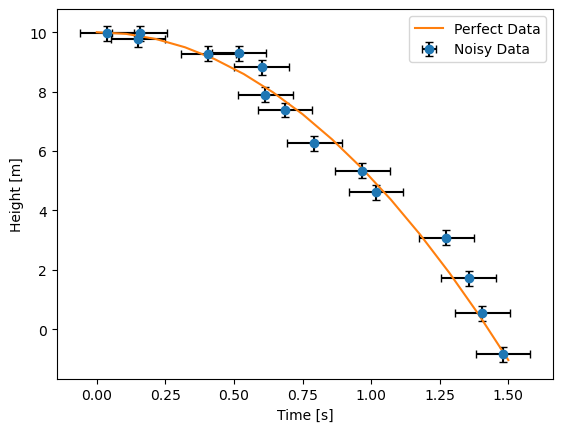

In [235]:
fig, ax = plt.subplots(1, 1)
# note order of inputs is xs, ys, uncertainty in ys (NOT XS!), then uncertainty in xs.
# to get rid of line connecting points, set fmt to just be circular markers
# to get caps (lines at the ends of the errorbars), set capsize to length of the caps in pts
ax.errorbar(noisy_times, noisy_ys, y_unc, t_unc, capsize=3, fmt='o', ecolor='black', label='Noisy Data')
ax.plot(expected_times, expected_ys, label='Perfect Data')
ax.set_ylabel('Height [m]')
ax.set_xlabel('Time [s]')
ax.legend(loc='best')

# Practical Tips
- **Use Examples to Learn**:
    - Google "matplotlib errboar asymmetric" or something similar; usually an excellent stack overflow qustion
    - Use [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration
- **Create a styleguide**
    - Creat your own `matplotlibrc` file that you include in the same directory as projects
    - Get basic one [here](https://matplotlib.org/stable/tutorials/introductory/customizing.html#a-sample-matplotlibrc-file). Copy into a file with the name `matplotlibrc` in the same directory, and `matplotlib` will use the styles you define there as the default.